<a href="https://colab.research.google.com/github/shengchishih/Machine-Learning-and-Deep-Learning/blob/main/Iris%20Classification-Decision%20Tree%2C%20Principal%20component%20analysis%2C%20Singular%20values%20decomposition%2C%20and%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

決策樹容易過擬合訓練數據 (Overfitting)，這意味著它在訓練數據上表現很好，但在測試數據上表現較差。因此，需要進行剪枝操作來減小樹的複雜度。

In [ ]:
# 引入必要的庫
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# 加載鳶尾花數據集作為範例
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
X.shape

(150, 4)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 創建決策樹分類器
clf = DecisionTreeClassifier()

# 使用訓練數據來訓練模型
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# 使用測試數據來評估模型性能
accuracy = clf.score(X_test, y_test)
print(f"準確率：{accuracy}")

準確率：1.0


In [ ]:
y_pred=clf.predict(X_test)

y_pred==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy=clf.accuracy_score(y_test, y_pred)
print(accuracy)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'accuracy_score'

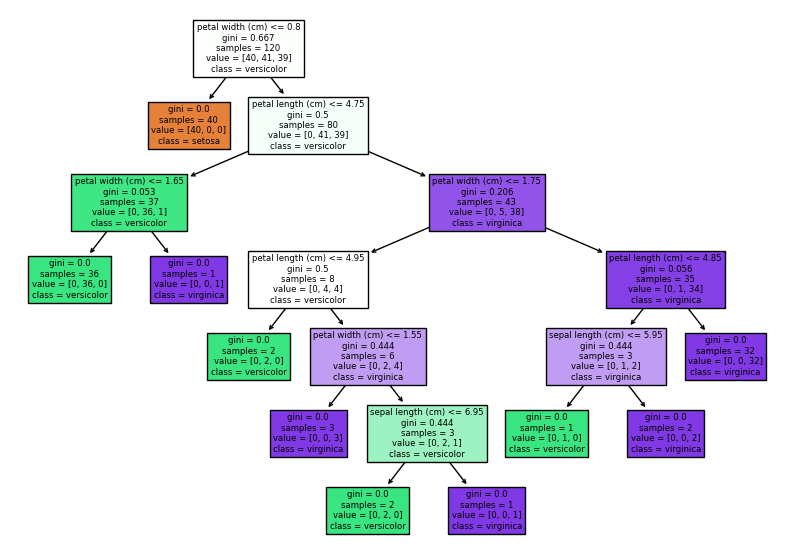

In [ ]:
# 繪製決策樹
plt.figure(figsize=(10, 7))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

Principal Component Analysis（主成分分析）

定義：
主成分分析（PCA）是一種線性降維技術，找到數據中的主要特徵或主成分，並將數據投影到這些主成分上，從而實現降維

工作原理：
計算協方差矩陣：首先，將數據進行標準化，然後計算其特徵的協方差矩陣
求解特徵向量和特徵值：通過對協方差矩陣進行特徵值分解或奇異值分解，獲得特徵向量和相應的特徵值
選擇主成分：根據特徵值的大小，選擇前k個主成分，這些主成分將包含大部分數據的變異性
投影：將數據投影到所選的主成分上，從而實現降維

應用：
降維：減少特徵數量，同時保留數據的主要信息。
壓縮：將高維數據轉換為低維表示，以節省計算資源和存儲空間

In [ ]:
from sklearn.decomposition import PCA

# 初始化 PCA 模型，選擇想要保留的主成分數量
pca = PCA(n_components=2)

# 進行 PCA 降維
X_pca = pca.fit_transform(X)
X_pca.shape

(150, 2)

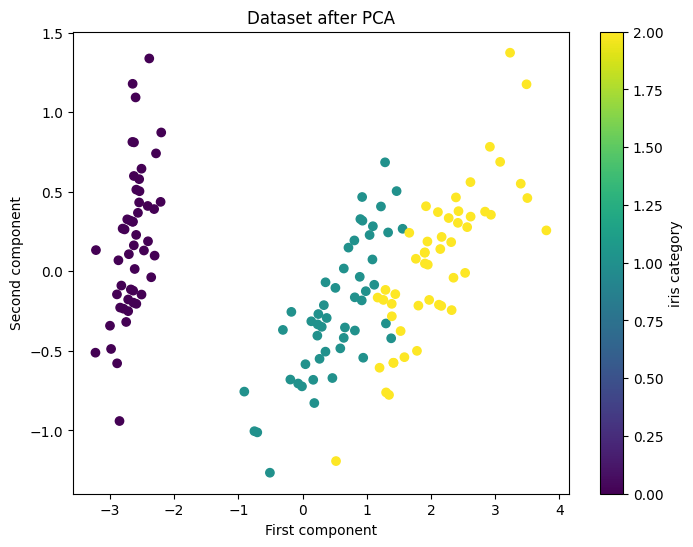

In [ ]:
# 繪製降維後的數據
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('Dataset after PCA')
plt.colorbar(label='iris category')
plt.show()

Singular Values Decomposition, SVD,（奇異值分解）

定義：
奇異值分解（SVD）是一種線性代數的技術，它將一個矩陣分解為三個矩陣的乘積，包括一個左奇異向量矩陣、一個對角奇異值矩陣和一個右奇異向量矩陣。

工作原理：
給定一個矩陣A，其SVD分解為：
A=UΣV^T
其中：
U是一個正交矩陣，包含了A的左奇異向量
Σ是一個對角矩陣，包含了A的奇異值
V^T是另一個正交矩陣，包含了A的右奇異向量

應用：
奇異值分解在矩陣的壓縮和重建中有廣泛的應用，也被用於特徵提取等

In [ ]:
from sklearn.decomposition import TruncatedSVD

# 初始化 TruncatedSVD 模型，選擇想要保留的主成分數量
svd = TruncatedSVD(n_components=2)

# 進行 SVD 降維
X_svd = svd.fit_transform(X)

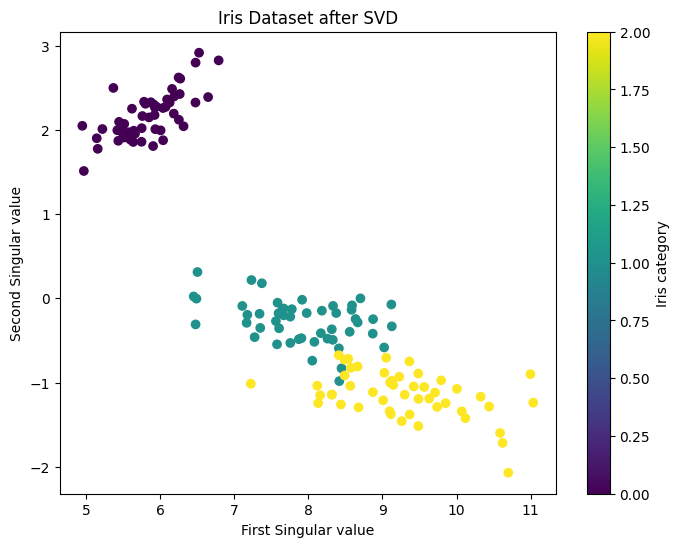

In [ ]:
# 繪製降維後的數據
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis')
plt.xlabel('First Singular value')
plt.ylabel('Second Singular value')
plt.title('Iris Dataset after SVD')
plt.colorbar(label='Iris category')
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 初始化邏輯回歸模型
logistic_reg = LogisticRegression()

# 在訓練集上訓練模型
logistic_reg.fit(X_train, y_train)

# 在測試集上進行預測
#y_pred = logistic_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 在測試集上進行預測
y_pred = logistic_reg.predict(X_test)

In [ ]:
# 評估模型
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# 打印結果
print(f'準確度：{accuracy}')
print(f'分類報告：\n{report}')

準確度：1.0
分類報告：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

